## Support Vector Machine (SVM)

---

###### Import required modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---

###### Load data, set X & y and put the data into the pandas dataframe:

In [2]:
iris_data = load_iris()
X = iris_data.data[:, [2, 3]]
y = iris_data.target
df = pd.DataFrame(X, columns=iris_data.feature_names[2:])
df["Labels"] = y
df

,petal length (cm),petal width (cm),Labels
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


---

###### Display the primitive diagram with all data:

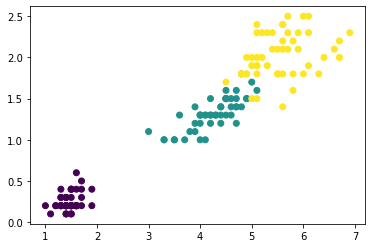

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

---

###### Grouping the data to train and test the model and train the model with training data:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVC(kernel="rbf", C=1, gamma=0.1).fit(X_train, y_train)

---

###### We can get the r (r representative the correlation). If r_sq_train is much higher than r_sq_test, overfitting has occurred. So:

In [5]:
r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)
print(f"Train Data Correlation: {round(r_sq_train*100, 2)}%\nTest Data Correlation: {round(r_sq_test*100, 2)}%")

Train Data Correlation: 96.67%
Test Data Correlation: 100.0%


---

###### Get predict from the model and calculate its accuracy:

In [6]:
forecasts = model.predict(X_test)
modelAccuracy = accuracy_score(y_test, forecasts)
print(f"Model Accuracy: {round(modelAccuracy*100, 2)}%")

Model Accuracy: 100.0%


---

###### Display the related diagram with dividing lines:

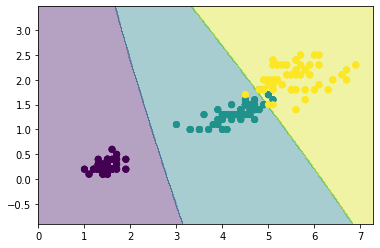

In [7]:
x1min, x1max = X_test[:, 0].min()-1, X_test[:, 0].max()+1
x2min, x2max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.02), np.arange(x2min, x2max, 0.02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

---

###### Display the confusion matrix:

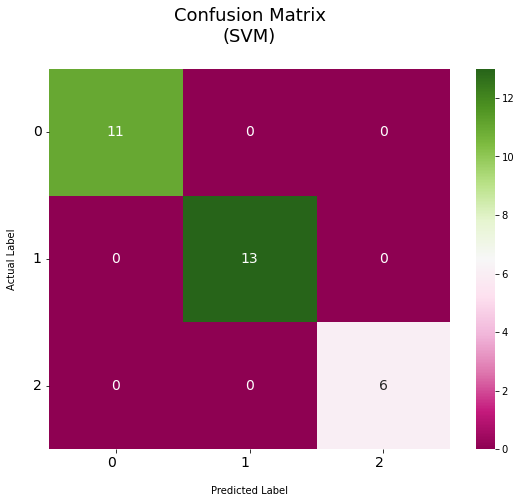

In [8]:
confusionMatrix = pd.DataFrame((confusion_matrix(y_test, forecasts)), (0, 1, 2), (0, 1, 2))
plt.figure(figsize=(9, 7))
heatmap = sbn.heatmap(confusionMatrix, annot=True, annot_kws={"size": 14}, fmt='d', cmap="PiYG")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14)
plt.title("Confusion Matrix\n(SVM)\n", fontsize=18)
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.show()

---

###### Display the report:

In [9]:
report = classification_report(y_test, forecasts)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---

## End